<a href="https://colab.research.google.com/github/parthbishnoi-collab/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Manual data construction
Student_basket = [
    {'Item':'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item' : 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item' : 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item' : 'Spotify', 'Price_2016': 9.99, 'Price_2024': 10.99},
]

In [ ]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
  return ((current-base)/base)*100

# Run the loop
for item in Student_basket:
  rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
  print(f"{item['Item']}: {rate:.2f}% Inflation")


Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 10.01% Inflation


In [ ]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='ddca00fcd3a0c46fda43d87e26791840')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
food = fred.get_series('CUSR0000SEFV')
subscriptions = fred.get_series('CUSR0000SERA02')

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    "official_cpi" :official_cpi,
    "tuition" :tuition,
    "rent" :rent,
    "food" :food,
    "subscriptions" :subscriptions
})

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
base_2016 =df.loc['2016-01-01']

In [ ]:
base_2016

,2016-01-01
official_cpi,237.652
tuition,699.997
rent,291.700
food,259.958
subscriptions,427.538


In [ ]:
Value_Index = (df/base_2016)*100

In [ ]:
Value_Index

,official_cpi,tuition,rent,food,subscriptions
1947-01-01,9.038426,NaN,NaN,NaN,NaN
1947-02-01,9.097336,NaN,NaN,NaN,NaN
1947-03-01,9.257233,NaN,NaN,NaN,NaN
1947-04-01,9.257233,NaN,NaN,NaN,NaN
1947-05-01,9.236194,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-08-01,136.066181,127.901262,149.969832,148.065841,138.608498
2025-09-01,136.488647,128.186549,150.264655,148.274337,138.918178
2025-10-01,NaN,NaN,NaN,NaN,NaN
2025-11-01,136.767627,128.857838,150.454234,148.947907,140.157366


In [ ]:
Value_Index.loc['2016-01-01']


,2016-01-01
official_cpi,100.0
tuition,100.0
rent,100.0
food,100.0
subscriptions,100.0


In [60]:
import matplotlib.pyplot as matplotlib

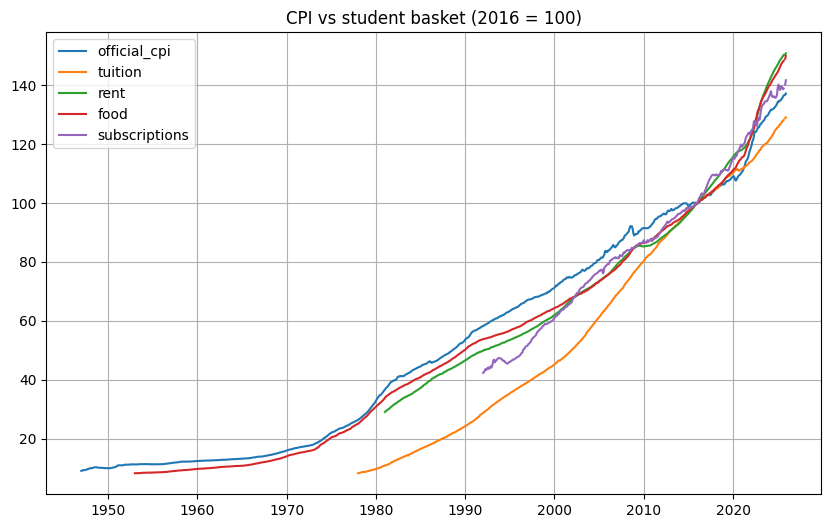

In [ ]:
matplotlib.figure(figsize=(10,6))

for col in Value_Index.columns:
  matplotlib.plot(Value_Index.index, Value_Index[col], label=col)

matplotlib.title("CPI vs student basket (2016 = 100)")
matplotlib.legend("Date")
matplotlib.legend("Index (2016 = 100)")
matplotlib.legend()
matplotlib.grid(True)

matplotlib.show()


In [ ]:
weights = {
    "tuition": 0.45,
    "rent": 0.35,
    "food": 0.15,
    "subscriptions": 0.05
}

In [53]:
Value_Index["Student_SPI"] = sum(
    Value_Index[col] * weight
    for col, weight in weights.items()
)

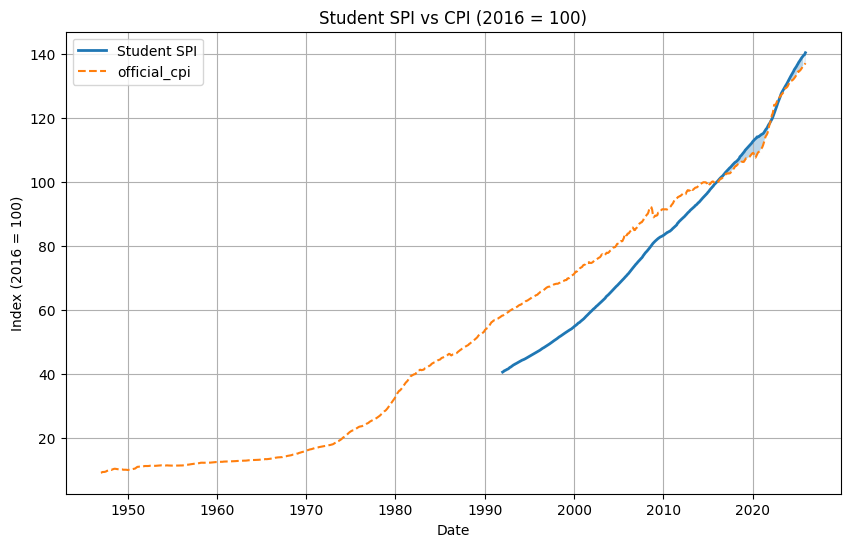

In [58]:
matplotlib.figure(figsize=(10,6))

matplotlib.plot(
    Value_Index.index,
    Value_Index["Student_SPI"],
label = "Student SPI",
    linewidth = 2
)

matplotlib.plot(
    Value_Index.index,
    Value_Index["official_cpi"],
label = "official_cpi",
    linestyle = "--"
)

matplotlib.fill_between(
    Value_Index.index,
    Value_Index["Student_SPI"],
    Value_Index["official_cpi"],
    alpha = 0.3,
    where=(Value_Index["Student_SPI"] > (Value_Index)["official_cpi"]),
    interpolate = True
)

matplotlib.title("Student SPI vs CPI (2016 = 100)")
matplotlib.xlabel("Date")
matplotlib.ylabel("Index (2016 = 100)")
matplotlib.legend()
matplotlib.grid(True)

matplotlib.show()

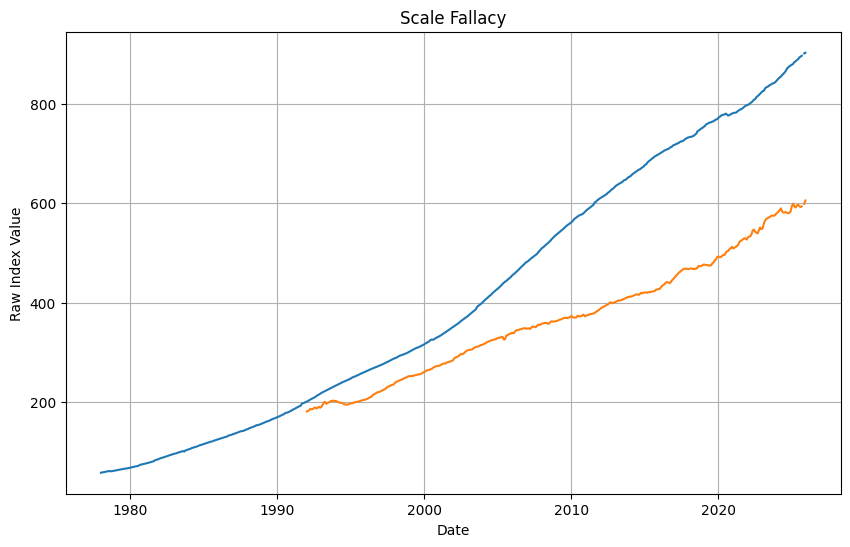

In [65]:
matplotlib. figure(figsize=(10,6))

matplotlib.plot(df.index, df["tuition"], label = "tuition (Raw Index)")
matplotlib.plot(df.index, df["subscriptions"], label = "subscriptions (Raw Index)")

matplotlib.title("Scale Fallacy")
matplotlib.xlabel("Date")
matplotlib.ylabel("Raw Index Value")
matplotlib.legend
matplotlib.grid(True)

matplotlib.show()


**Data Crime (written response)**

The data from the FRED is indexed for different base years, essentially all of the data for the indexes all lie on a different temporal reference points therefore any comparision drawn between them is moot. Thus it was important to re-index all the series so that each set would have the same base year (2016).

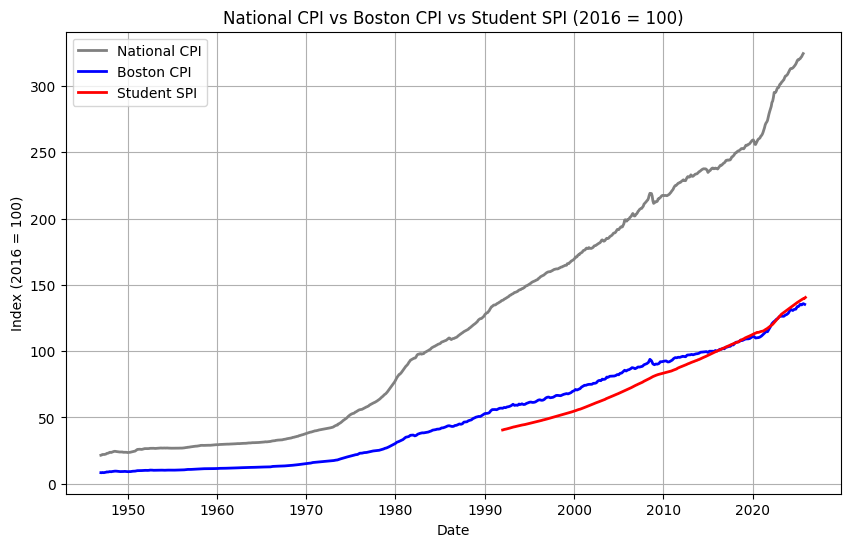

In [72]:
import pandas as pd
import matplotlib.pyplot as matplotlib
from fredapi import Fred

# df already exists with columns:
# 'official_cpi' and 'Student_SPI'

fred = Fred(api_key="ddca00fcd3a0c46fda43d87e26791840")  # assumes API key is set via environment variable

# Fetch Boston CPI-U
BOSTON_SERIES = "CUURA103SA0"
boston_raw = fred.get_series(BOSTON_SERIES)

boston = pd.Series(boston_raw, name="boston_cpi")
boston.index = pd.to_datetime(boston.index)

# Handle missing values / frequency
boston = (
    boston.resample("MS")
           .mean()
           .interpolate(method="time")
)

# Re-index Boston CPI to 2016 = 100
base = boston.loc["2016"].iloc[0]
boston_indexed = boston.div(base).mul(100)

# Join with main DataFrame
df.index = pd.to_datetime(df.index)
plot_df = df.join(boston_indexed, how="inner")

# Plot
matplotlib.figure(figsize=(10, 6))

matplotlib.plot(
    plot_df.index,
    plot_df["official_cpi"],
    label="National CPI",
    color="grey",
    linewidth=2
)

matplotlib.plot(
    plot_df.index,
    plot_df["boston_cpi"],
    label="Boston CPI",
    color="blue",
    linewidth=2
)

matplotlib.plot(
    Value_Index.index,
    Value_Index["Student_SPI"],
    label="Student SPI",
    color="red",
    linewidth=2
)


matplotlib.title("National CPI vs Boston CPI vs Student SPI (2016 = 100)")
matplotlib.xlabel("Date")
matplotlib.ylabel("Index (2016 = 100)")
matplotlib.legend()
matplotlib.grid(True)
matplotlib.show()
